In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from vega_datasets import data

In [4]:
from dataviz import format_plot

In [5]:
import seaborn as sns

## Get Data

In [6]:
df_gpm_lxp = data.gapminder()
df_gpm_lxp.head()

,year,country,cluster,pop,life_expect,fertility
0,1955,Afghanistan,0,8891209,30.332,7.7
1,1960,Afghanistan,0,9829450,31.997,7.7
2,1965,Afghanistan,0,10997885,34.020,7.7
3,1970,Afghanistan,0,12430623,36.088,7.7
4,1975,Afghanistan,0,14132019,38.438,7.7


---
# Interactive Visualization with Widgets

- IPython Widgets
- See: https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html

## 2a. Standalone Widgets

In [7]:
from ipywidgets import Dropdown, IntSlider, FloatSlider, ToggleButtons, SelectMultiple

### Dropdown

In [8]:
fruits = Dropdown(value='apples', 
                  description='Pick one:',
                  options=['apples', 'grapes', 'bananas', 'oranges'])
fruits

Dropdown(description='Pick one:', options=('apples', 'grapes', 'bananas', 'oranges'), value='apples')

In [9]:
print(f"You selected {fruits.value}")

You selected apples


### Slider

In [10]:
ages = IntSlider(description="Age: ",
                     value=30, 
                     min=20, 
                     max=50, 
                     step=1)
ages

IntSlider(value=30, description='Age: ', max=50, min=20)

In [11]:
print(f"You selected {ages.value}")

You selected 30


### Toggle

In [12]:
rsvp = ToggleButtons(value='Maybe', options=['No', 'Yes', 'Maybe'], description='Call me:')
rsvp

ToggleButtons(description='Call me:', index=2, options=('No', 'Yes', 'Maybe'), value='Maybe')

In [13]:
print(f"You selected {rsvp.value}")

You selected Maybe


### Select

In [14]:
lunch = SelectMultiple(description='Lunch order', options=['spaghetti', 'lasagna', 'pasta', 'salad', 'calzone', 'wine'])
lunch

SelectMultiple(description='Lunch order', options=('spaghetti', 'lasagna', 'pasta', 'salad', 'calzone', 'wine'…

In [15]:
print(f"You selected {lunch.value}")

You selected ()


## 2b. Interactive Charts

In [16]:
from ipywidgets import interactive

# Histogram of Life Expectancy in any given Year

## Example 1. Hardcoded

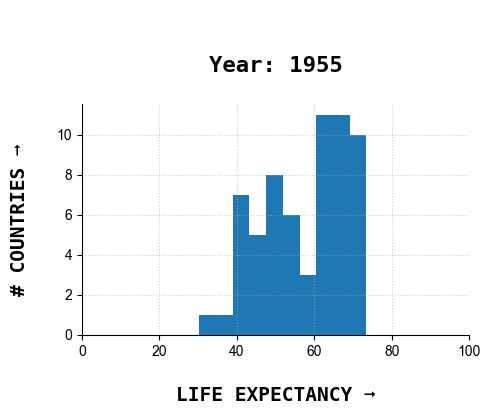

In [17]:
ax = df_gpm_lxp.query("year==1955").loc[:, 'life_expect'].plot.hist(figsize=(5, 3))
ax.set_xlabel("Life Expectancy")
ax.set_ylabel("# Countries")
ax.set_xlim(0, 100)
ax.set_title("Year: 1955")

format_plot(ax)

## Example 2: Parameterized

- We use a Python function that takes the year as an argument, to plot the histogram
- Try changing the value of int_year and observe the changes

In [18]:
def plot_hist_lifeexp(int_year):
    """
    """
    ax = df_gpm_lxp.query(f"year=={int_year}").loc[:, 'life_expect'].plot.hist(figsize=(5, 3))
    ax.set_xlabel("Life Expectancy")
    ax.set_ylabel("# Countries")
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 30)
    ax.set_title(f"Year: {int_year}")
    
    format_plot(ax)

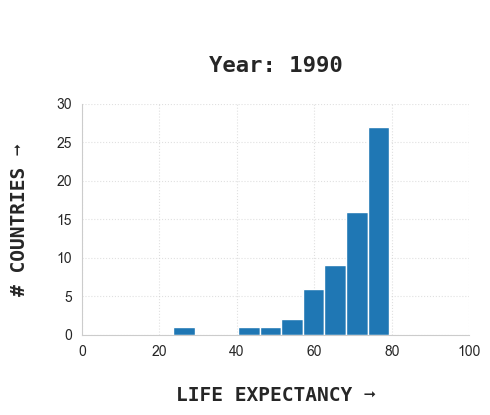

In [19]:
plot_hist_lifeexp(int_year=1990)

## Example 3: Interactive

- We allow the user to select a value for the year
- And pass it to a function that generates the visualization
- We then use the `interactive` function from ipywidgets which requires
    - A widget that catches the value selected by the user and passes it to
    - A function that does something with this value, such as making a plot

In [20]:
from ipywidgets import interactive

In [21]:
interactive(
    lambda x: plot_hist_lifeexp(int_year=x), 
    x=Dropdown(
        description='Select Year',
        value=1970,
        options=df_gpm_lxp.year.unique()
    )
)

interactive(children=(Dropdown(description='Select Year', index=3, options=(np.int64(1955), np.int64(1960), np…

<br>

---

# Exercise

Use the stocks data from vega_datasets to
- allow the user to select one or many symbols
- plot them all on the same line chart

<br>

In [24]:
df_stocks = data.stocks()
df_stocks.sample(5)

,symbol,date,price
383,GOOG,2005-10-01,372.14
252,IBM,2000-07-01,100.74
188,AMZN,2005-06-01,33.09
381,GOOG,2005-08-01,286.00
160,AMZN,2003-02-01,22.01


In [25]:
df_stocks.symbol.unique().tolist()

['MSFT', 'AMZN', 'IBM', 'GOOG', 'AAPL']

In [45]:
def plot_stocks(list_symbols):
    """
    """
    ax = df_stocks.query(f"symbol in {list_symbols}").pivot(index='date', columns='symbol', values='price').plot(figsize=(7, 3))
    ax.set_ylabel("Price")
    format_plot(ax)

## Use the `SelectMultiple` widget

- Allows users to select multiple items from a list (by holding down the CTRL key and clicking on items)
- Returns the items selected as a list

In [46]:
interactive(plot_stocks,
            list_symbols=SelectMultiple(
                description="Pick companies to compare",
                value=['AAPL'],
                options=df_stocks.symbol.unique().tolist()))

interactive(children=(SelectMultiple(description='Pick companies to compare', index=(4,), options=('MSFT', 'AM…

## 2c. Animation

In [47]:
from ipywidgets import Play

In [48]:
Play?

Init signature: Play(value=None, min=None, max=None, step=None, **kwargs)
Docstring:     
Play/repeat buttons to step through values automatically, and optionally loop.
    
Init docstring: Public constructor
File:           ~/Code/cst4150/.fintech/lib/python3.14/site-packages/ipywidgets/widgets/widget_int.py
Type:           MetaHasTraits
Subclasses:     

In [57]:
play = Play(
    interval=500,
    value=1955,
    min=1955,
    max=2005,
    step=5,
    description="Press play",
    disabled=False
)

interactive_plot = \
interactive(
    lambda year: format_plot(df_gpm_lxp
                             .query(f"year=={year}")
                             .loc[:, 'life_expect']
                             .plot
                             .hist(bins=20, 
                                   xlim=(0, 100), 
                                   ylim=(0, 30),
                                   title=f"Global Life Expectancy in {year}", 
                                   figsize=(8, 5))), 
    year=play)

output = interactive_plot.children[-1]
# output.layout.height = '400px'
interactive_plot

interactive(children=(Play(value=1955, description='Press play', interval=500, max=2005, min=1955, step=5), Ou…